### User Analytics in the Telecommunication Industry

### 1.0 Import Required packages

In [2]:
# All imports 

import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2.0 Load data and Clear data

In [3]:
#load data
tel_data = pd.read_excel("Week2_challenge_data_source.xlsx")

In [4]:
#show head rows
tel_data.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
#describe datas info and properties
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
Bearer Id                                   150001 non-null object
Start                                       150000 non-null datetime64[ns]
Start ms                                    150000 non-null float64
End                                         150000 non-null datetime64[ns]
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null f

In [6]:
#describe numerical data
tel_data.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [7]:
#showing how many null values ar available
tel_data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Using heatmap to check for missing values 

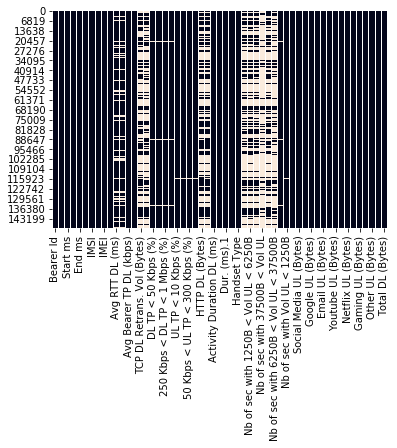

In [8]:
#using seaborn heatmap to check for missing values and where from.
sns.heatmap(tel_data.isnull(), cbar=False)

As we can see from above heat map we can identify missing values such as:-

1. Avg RTT DL (ms) has a missing value in the middle of the data
2. Avg RTT UL (ms) has a missing value
3. Nb of sec with 125000B < Vol DL, Nb of sec with 1250B < Vol UL < 6250B,  Nb of sec with 31250B < Vol DL < 125000B, Nb of sec with 37500B < Vol UL,  Nb of sec with 6250B < Vol DL < 31250B and  Nb of sec with 6250B < Vol UL < 37500B has most missing values

We can substitute most of null values as `NaN` can be changed to value of `0`

In [9]:
#replacing null values with apprioprate data based on the type the columns.

tel_data['Last Location Name'].fillna('Unknown',inplace=True)
tel_data['Avg RTT DL (ms)'].fillna(tel_data['Avg RTT DL (ms)'].mean(),inplace=True)
tel_data['Avg RTT UL (ms)'].fillna(tel_data['Avg RTT UL (ms)'].mean(),inplace=True)

tel_data['TCP DL Retrans. Vol (Bytes)'].fillna(tel_data['TCP DL Retrans. Vol (Bytes)'].median(),inplace=True)
tel_data['TCP UL Retrans. Vol (Bytes)'].fillna(tel_data['TCP UL Retrans. Vol (Bytes)'].median(),inplace=True)
tel_data['DL TP < 50 Kbps (%)'].fillna(tel_data['DL TP < 50 Kbps (%)'].median(),inplace=True)
tel_data['50 Kbps < DL TP < 250 Kbps (%)'].fillna(tel_data['50 Kbps < DL TP < 250 Kbps (%)'].median(),inplace=True)
tel_data['250 Kbps < DL TP < 1 Mbps (%)'].fillna(tel_data['250 Kbps < DL TP < 1 Mbps (%)'].median(),inplace=True)
tel_data['DL TP > 1 Mbps (%)'].fillna(tel_data['DL TP > 1 Mbps (%)'].median(),inplace=True)
tel_data['UL TP < 10 Kbps (%)'].fillna(tel_data['UL TP < 10 Kbps (%)'].median(),inplace=True)
tel_data['10 Kbps < UL TP < 50 Kbps (%)'].fillna(tel_data['10 Kbps < UL TP < 50 Kbps (%)'].median(),inplace=True)
tel_data['50 Kbps < UL TP < 300 Kbps (%)'].fillna(tel_data['50 Kbps < UL TP < 300 Kbps (%)'].median(),inplace=True)
tel_data['UL TP > 300 Kbps (%)'].fillna(tel_data['UL TP > 300 Kbps (%)'].median(),inplace=True)
tel_data['HTTP DL (Bytes)'].fillna(tel_data['HTTP DL (Bytes)'].median(),inplace=True)
tel_data['HTTP UL (Bytes)'].fillna(tel_data['HTTP UL (Bytes)'].median(),inplace=True)

tel_data['Handset Manufacturer'].fillna('Unknown',inplace=True)
tel_data['Handset Type'].fillna('Unknown',inplace=True)

tel_data['Nb of sec with 125000B < Vol DL'].fillna(tel_data['Nb of sec with 125000B < Vol DL'].mean(), inplace=True)
tel_data['Nb of sec with 1250B < Vol UL < 6250B'].fillna(tel_data['Nb of sec with 1250B < Vol UL < 6250B'].mean(), inplace=True)
tel_data['Nb of sec with 31250B < Vol DL < 125000B'].fillna(tel_data['Nb of sec with 31250B < Vol DL < 125000B'].mean(), inplace=True)
tel_data['Nb of sec with 37500B < Vol UL'].fillna(tel_data['Nb of sec with 37500B < Vol UL'].mean(), inplace=True)
tel_data['Nb of sec with 6250B < Vol DL < 31250B'].fillna(tel_data['Nb of sec with 6250B < Vol DL < 31250B'].mean(), inplace=True)
tel_data['Nb of sec with 6250B < Vol UL < 37500B'].fillna(tel_data['Nb of sec with 6250B < Vol UL < 37500B'].mean(), inplace=True)
tel_data['Nb of sec with Vol DL < 6250B'].fillna(tel_data['Nb of sec with Vol DL < 6250B'].mean(), inplace=True)
tel_data['Nb of sec with Vol UL < 1250B'].fillna(tel_data['Nb of sec with Vol UL < 1250B'].mean(), inplace=True)





In [10]:
tel_data.isnull().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       1
End                                            1
End ms                                         1
Dur. (ms)                                      1
IMSI                                         570
MSISDN/Number                               1066
IMEI                                         572
Last Location Name                             0
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        1
Avg Bearer TP UL (kbps)                        1
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [11]:
#droping rows which is supposed to have unique value and have null or NaN values
tel_data = tel_data.dropna()

In [12]:
tel_data.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

### top 10 handsets used by the customers

In [13]:
top10handsets = tel_data.groupby('Handset Type')['Handset Type'].count().nlargest(10)
top10handsets

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: Handset Type, dtype: int64

### identify the top 3 handset manufacturers

In [14]:
top3handset_manufacturer = tel_data.groupby('Handset Manufacturer')['Handset Manufacturer'].count().nlargest(3)
top3handset_manufacturer 

Handset Manufacturer
Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64

### identify the top 5 handsets per handset manufacturer

In [137]:
top5hadsetPerManufacturer = tel_data['Handset Type'].groupby(tel_data['Handset Manufacturer']).apply(lambda x:x.value_counts().head(5)).to_frame()
top5hadsetPerManufacturer

Handset Type
Handset Manufacturer                                                                                              
A-Link Telecom International Co Limited           A-Link Telecom I. Cubot X18 Plus                               2
                                                  A-Link Telecom I. Cubot Note S                                 1
                                                  A-Link Telecom I. Cubot A5                                     1
                                                  A-Link Telecom I. Cubot Nova                                   1
                                                  A-Link Telecom I. Cubot Power                                  1
ASUSTeK                                           Asustek Asus Zb552Kl Zenfone Go                                7
                                                  Asustek Asus Zenfone2 Laser Ze600Kl                            5
                                                  Asustek Asus Zenfone2 Laser Ze601Kl                            4
                                                  Asustek Asus Zenfone 2 Laser Ze500Kl                           3
                                                  Asustek Asus Zenfone Selfie Zd551Kl                            2
Acer                                              Acer M310                                                      5
                                                  Acer Liquid Zest Plus                                          2
                                                  Acer Liquid Z220                                               1
                                                  Acer Liquid Z530                                               1
                                                  Acer Liquid Z630                                               1
Adar                                              Adar Stanley Mobile S231                                       1
Alif Communications                               Alif Communicati. Pulian Cm84                                  1
Apple                                             Apple iPhone 6S (A1688)                                     9413
                                                  Apple iPhone 6 (A1586)                                      9012
                                                  Apple iPhone 7 (A1778)                                      6304
                                                  Apple iPhone Se (A1723)                                     5176
                                                  Apple iPhone 8 (A1905)                                      4985
Archos SA                                         Archos Sa Diamond S                                            1
                                                  Archos Sa Archos 50C Platinum                                  1
                                                  Archos Sa Archos 45B Helium 50B Helium 50C Heli...             1
                                                  Archos Sa Archos 40 Helium                                     1
                                                  Archos Sa 50 Cesium                                            1
Archos Sa                                         Archos Sa 55 Helium (Ultra)                                    8
                                                  Archos Sa 50 Saphir                                            7
                                                  Archos Sa Access 45 4G                                         5
...                                                                                                            ...
Wiko Global Sasu                                  Wiko Global Sasu Wiko Rainbow Lite 4G                         44
                                                  Wiko Global Sasu Wiko Sunny                                   34
Wileyfox Europe Limited                           Wileyfox Europe. Wileyfox S

# Task 1

## Task 1.1

### Number of xDR sessions per user

In [46]:
tel_data.groupby(['Bearer Id'])['Bearer Id'].count()

Bearer Id
6917537518543529984       1
6917537604825860096       1
6917537608536819712       1
6917537633966310400       1
6917537638622189568       1
6917537651255709696       1
6917537652151560192       1
6917537652267270144       1
6917537654333070336       1
6917537654899680256       1
6917537655185130496       1
6917537655290640384       1
6917537655470950400       2
6917537656433600512       1
6917537658317200384       1
6917537660029989888       1
6917537660107089920       1
6917537660191760384       1
6917537661419759616       1
6917537663449109504       1
6917537663479629824       1
6917537663548739584       1
6917537663846559744       1
6917537664571459584       1
6917537666115529728       1
6917537668960190464       1
6917537669007750144       1
6917537669259540480       1
6917537669276069888       1
6917537669470959616       1
                       ... 
13186541159673700352      1
13186541159690500096      1
13186541159727499264      1
13186541159792099328      1
1318654115

#### Session duration per user aggregate

In [47]:
#Session duration for each user in milliseconds
tel_data.groupby(['Bearer Id'])['Dur. (ms)'].sum()

Bearer Id
6917537518543529984        24534.0
6917537604825860096        21489.0
6917537608536819712        27786.0
6917537633966310400        15635.0
6917537638622189568        24264.0
6917537651255709696        15548.0
6917537652151560192        20701.0
6917537652267270144        12604.0
6917537654333070336        61431.0
6917537654899680256        18800.0
6917537655185130496        10263.0
6917537655290640384         9860.0
6917537655470950400       321162.0
6917537656433600512       256849.0
6917537658317200384         8604.0
6917537660029989888        15273.0
6917537660107089920         9224.0
6917537660191760384        12934.0
6917537661419759616        14085.0
6917537663449109504        33113.0
6917537663479629824        11823.0
6917537663548739584        19030.0
6917537663846559744        18070.0
6917537664571459584        15494.0
6917537666115529728        14467.0
6917537668960190464        10236.0
6917537669007750144        62446.0
6917537669259540480        22031.0
6917537669

#### the total download (DL) and upload (UL) data  per user

In [ ]:
tel_data.groupby(['Bearer Id'])['Total DL (Bytes)','Total UL (Bytes)'].sum()

###  the total data volume (in Bytes) during this session for each application

In [15]:
newdf = tel_data.groupby('Bearer Id').agg({'Bearer Id' : ['count'],'Dur. (ms)':['sum'],'Total DL (Bytes)':['sum'],'Total UL (Bytes)':['sum']
                                          ,'Social Media DL (Bytes)':['sum'],'Social Media UL (Bytes)':['sum'], 'Google DL (Bytes)': ['sum']
                                          ,'Google UL (Bytes)': ['sum'],'Email DL (Bytes)':['sum'],'Email UL (Bytes)': ['sum'],'Youtube DL (Bytes)':['sum']
                                          ,'Youtube UL (Bytes)':['sum'],'Netflix DL (Bytes)':['sum'],'Netflix UL (Bytes)':['sum'],'Gaming DL (Bytes)':['sum']
                                          ,'Gaming UL (Bytes)': ['sum'],'Other DL (Bytes)':['sum'], 'Other UL (Bytes)':['sum']})

newdf.columns = ["_".join(x) for x in newdf.columns.ravel()]

newdf['social_media_total'] = newdf['Social Media DL (Bytes)_sum'] + newdf['Social Media UL (Bytes)_sum']
newdf['google_total'] = newdf['Google DL (Bytes)_sum'] + newdf['Google UL (Bytes)_sum']
newdf['email_total'] = newdf['Email DL (Bytes)_sum'] + newdf['Email UL (Bytes)_sum']
newdf['youtube_total'] = newdf['Youtube DL (Bytes)_sum'] + newdf['Youtube UL (Bytes)_sum']
newdf['netflix_total'] = newdf['Netflix DL (Bytes)_sum'] + newdf['Netflix UL (Bytes)_sum']
newdf['gaming_total'] = newdf['Gaming DL (Bytes)_sum'] + newdf['Gaming UL (Bytes)_sum']
newdf['other_total'] = newdf['Other DL (Bytes)_sum'] + newdf['Other UL (Bytes)_sum']


In [16]:
newdf

,Bearer Id_count,Dur. (ms)_sum,Total DL (Bytes)_sum,Total UL (Bytes)_sum,Social Media DL (Bytes)_sum,Social Media UL (Bytes)_sum,Google DL (Bytes)_sum,Google UL (Bytes)_sum,Email DL (Bytes)_sum,Email UL (Bytes)_sum,...,Gaming UL (Bytes)_sum,Other DL (Bytes)_sum,Other UL (Bytes)_sum,social_media_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total
Bearer Id,,,,,,,,,,,,,,,,,,,,,
6917537518543529984,1,24534.0,5.007220e+08,4.170461e+07,2404741.0,2410.0,5.791591e+06,2871336.0,782388.0,806920.0,...,5.333340e+06,6.707510e+08,1.595072e+07,2407151.0,8.662927e+06,1589308.0,8.211170e+06,3.416263e+07,4.714427e+08,6.867018e+08
6917537604825860096,1,21489.0,7.095493e+08,3.869360e+07,2478607.0,11936.0,3.605446e+06,2825198.0,446376.0,525108.0,...,2.670856e+06,5.016085e+08,3.908870e+06,2490543.0,6.430644e+06,971484.0,2.840120e+07,3.008670e+07,6.759534e+08,5.055173e+08
6917537608536819712,1,27786.0,8.544659e+08,1.554893e+07,944612.0,2827.0,1.037316e+07,56392.0,128003.0,34038.0,...,8.521398e+06,4.728469e+08,1.337849e+06,947439.0,1.042955e+07,162041.0,9.681010e+06,1.705641e+07,8.304005e+08,4.741847e+08
6917537633966310400,1,15635.0,8.257865e+08,4.960569e+07,1817239.0,19827.0,2.699880e+05,3696393.0,3191192.0,896670.0,...,1.625748e+07,2.430380e+07,1.590761e+07,1837066.0,3.966381e+06,4087862.0,2.343655e+07,4.597534e+06,8.215592e+08,4.021141e+07
6917537638622189568,1,24264.0,6.249578e+08,2.198346e+07,1867318.0,18928.0,1.689296e+06,195216.0,740633.0,590043.0,...,6.992868e+06,6.851222e+08,2.966860e+06,1886246.0,1.884512e+06,1330676.0,2.363338e+07,2.438197e+07,5.908576e+08,6.880891e+08
6917537651255709696,1,15548.0,5.721995e+08,4.728137e+07,1502346.0,37348.0,8.917833e+06,701876.0,332813.0,537902.0,...,1.582066e+07,4.636987e+08,1.193964e+07,1539694.0,9.619709e+06,870715.0,1.584005e+07,2.151305e+07,5.581580e+08,4.756384e+08
6917537652151560192,1,20701.0,7.361892e+08,2.613630e+07,620907.0,29485.0,2.070826e+06,699962.0,3067254.0,146342.0,...,2.840435e+06,7.859117e+08,2.655340e+05,650392.0,2.770788e+06,3213596.0,2.519027e+07,4.037169e+06,7.261978e+08,7.861772e+08
6917537652267270144,1,12604.0,8.366814e+08,5.063395e+07,56234.0,1250.0,1.795518e+06,1092414.0,392715.0,52817.0,...,1.107557e+07,5.652172e+08,1.595803e+07,57484.0,2.887932e+06,445532.0,1.264600e+07,3.175418e+07,8.235662e+08,5.811753e+08
6917537654333070336,1,61431.0,9.013464e+07,3.875275e+07,1959793.0,21396.0,7.711263e+06,297843.0,208023.0,430760.0,...,7.382302e+06,9.655214e+06,9.667887e+06,1981189.0,8.009106e+06,638783.0,2.313040e+07,2.476242e+07,6.069761e+07,1.932310e+07


## Task 1.2

In [17]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134256 entries, 6917537518543529984 to 
Data columns (total 25 columns):
Bearer Id_count                134256 non-null int64
Dur. (ms)_sum                  134256 non-null float64
Total DL (Bytes)_sum           134256 non-null float64
Total UL (Bytes)_sum           134256 non-null float64
Social Media DL (Bytes)_sum    134256 non-null float64
Social Media UL (Bytes)_sum    134256 non-null float64
Google DL (Bytes)_sum          134256 non-null float64
Google UL (Bytes)_sum          134256 non-null float64
Email DL (Bytes)_sum           134256 non-null float64
Email UL (Bytes)_sum           134256 non-null float64
Youtube DL (Bytes)_sum         134256 non-null float64
Youtube UL (Bytes)_sum         134256 non-null float64
Netflix DL (Bytes)_sum         134256 non-null float64
Netflix UL (Bytes)_sum         134256 non-null float64
Gaming DL (Bytes)_sum          134256 non-null float64
Gaming UL (Bytes)_sum          134256 non-null float64
Othe

In [18]:
newdf['Bearer Id_count'].describe()

count    134256.000000
mean          1.109336
std           1.229708
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         429.000000
Name: Bearer Id_count, dtype: float64

In [19]:
newdf['Dur. (ms)_sum'].describe()

count    1.342560e+05
mean     1.163362e+05
std      1.060904e+05
min      7.142000e+03
25%      6.031450e+04
50%      8.640000e+04
75%      1.531792e+05
max      1.322499e+07
Name: Dur. (ms)_sum, dtype: float64

In [20]:
newdf['Total DL (Bytes)_sum'].describe()

count    1.342560e+05
mean     5.043320e+08
std      6.014927e+08
min      8.827082e+06
25%      2.614673e+08
50%      4.876832e+08
75%      7.064290e+08
max      1.892541e+11
Name: Total DL (Bytes)_sum, dtype: float64

In [21]:
newdf['Total UL (Bytes)_sum'].describe()

count    1.342560e+05
mean     4.561327e+07
std      5.128622e+07
min      2.866892e+06
25%      3.406748e+07
50%      4.252290e+07
75%      5.176658e+07
max      1.738206e+10
Name: Total UL (Bytes)_sum, dtype: float64

In [22]:
newdf.describe()

,Bearer Id_count,Dur. (ms)_sum,Total DL (Bytes)_sum,Total UL (Bytes)_sum,Social Media DL (Bytes)_sum,Social Media UL (Bytes)_sum,Google DL (Bytes)_sum,Google UL (Bytes)_sum,Email DL (Bytes)_sum,Email UL (Bytes)_sum,...,Gaming UL (Bytes)_sum,Other DL (Bytes)_sum,Other UL (Bytes)_sum,social_media_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total
count,134256.000000,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,...,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05,1.342560e+05
mean,1.109336,1.163362e+05,5.043320e+08,4.561327e+07,1.991437e+06,3.652124e+04,6.380428e+06,2.281036e+06,1.987673e+06,5.184919e+05,...,9.195380e+06,4.671938e+08,9.166652e+06,2.027958e+06,8.661463e+06,2.506165e+06,2.511772e+07,2.510175e+07,4.773635e+08,4.763605e+08
std,1.229708,1.060904e+05,6.014927e+08,5.128622e+07,2.467557e+06,4.501820e+04,7.818111e+06,2.795271e+06,2.452050e+06,6.365934e+05,...,1.118211e+07,5.757352e+08,1.150930e+07,2.503891e+06,1.019568e+07,2.987130e+06,2.937645e+07,2.895919e+07,5.744645e+08,5.850609e+08
min,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,1.200000e+01,0.000000e+00,2.070000e+02,3.000000e+00,1.400000e+01,2.000000e+00,...,5.900000e+01,3.290000e+03,1.560000e+02,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,1.057770e+05,3.063580e+05,1.490450e+05
25%,1.000000,6.031450e+04,2.614673e+08,3.406748e+07,9.745760e+05,1.779700e+04,3.121566e+06,1.112054e+06,9.662860e+05,2.533670e+05,...,4.484742e+06,2.281549e+08,4.494414e+06,1.007964e+06,5.205154e+06,1.439034e+06,1.671536e+07,1.666386e+07,2.362731e+08,2.366742e+08
50%,1.000000,8.640000e+04,4.876832e+08,4.252290e+07,1.925856e+06,3.536050e+04,6.174082e+06,2.204862e+06,1.922891e+06,4.999410e+05,...,8.889082e+06,4.515563e+08,8.846010e+06,1.960072e+06,8.295586e+06,2.409543e+06,2.368348e+07,2.363814e+07,4.623621e+08,4.598227e+08
75%,1.000000,1.531792e+05,7.064290e+08,5.176658e+07,2.857714e+06,5.233225e+04,9.135438e+06,3.277601e+06,2.853349e+06,7.429792e+05,...,1.316695e+07,6.705316e+08,1.313352e+07,2.892174e+06,1.128999e+07,3.347571e+06,3.130932e+07,3.130899e+07,6.807573e+08,6.794509e+08
max,429.000000,1.322499e+07,1.892541e+11,1.738206e+10,7.726754e+08,1.406855e+07,2.438296e+09,8.709294e+08,7.662960e+08,1.984291e+08,...,3.479663e+09,1.799064e+11,3.619766e+09,7.867440e+08,3.309226e+09,9.647250e+08,9.666693e+09,9.496366e+09,1.787927e+11,1.835262e+11


### Session duration graphical univariate analysis

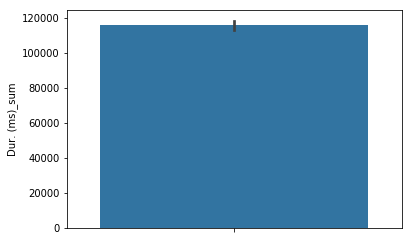

In [58]:
# Bar plot of session duration by using sample data of 5000
sns.barplot(y="Dur. (ms)_sum", data=newdf.sample(5000))

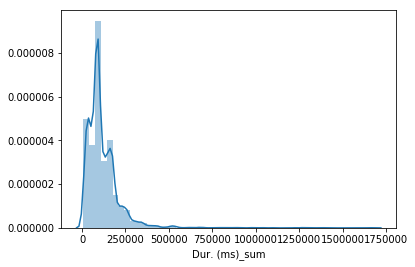

In [57]:
# Histogram of session duration by using sample data of 5000
sns.distplot(newdf['Dur. (ms)_sum'].sample(5000))
plt.show()


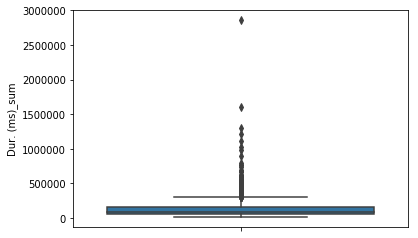

In [55]:
#Box plot of session duration by using sample dat of 5000
sns.boxplot(y=newdf['Dur. (ms)_sum'].sample(5000))

As we can see from above plots the `session duration` have `outliers`. And to get apprioprate result the outliers should be removed

### Total download(DL) and Total Upload(UL) graphical univariate analysis

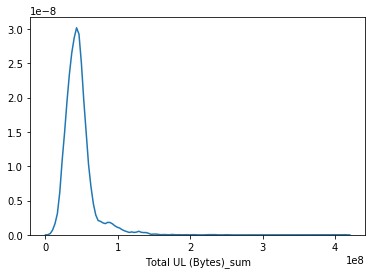

In [54]:
#Histogram fo total upload per user by using sample data of 5000 
sns.distplot(newdf['Total UL (Bytes)_sum'].sample(5000),hist=False)
plt.show()


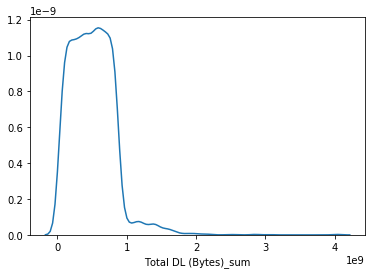

In [53]:
#Histogram of total download per user using sample data of 5000
sns.distplot(newdf['Total DL (Bytes)_sum'].sample(5000),hist=False)
plt.show()

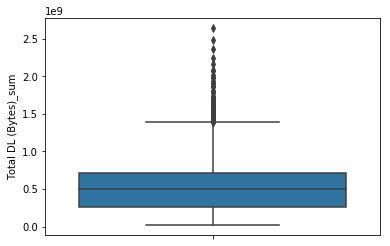

In [52]:
#Box plot of total download per user by using sample data of 5000
sns.boxplot(y=newdf['Total DL (Bytes)_sum'].sample(5000))
plt.show()

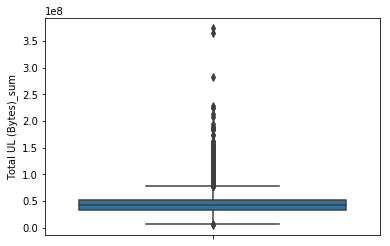

In [51]:
#Box plot of total upload per user by using sample data of 5000
sns.boxplot(y=newdf['Total UL (Bytes)_sum'].sample(5000))
plt.show()

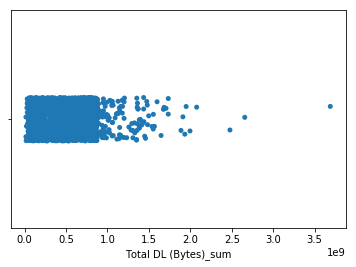

In [50]:
#Point plot of total download per user by using sample data of 2000
sns.stripplot(x=newdf['Total DL (Bytes)_sum'].sample(2000))
plt.show()

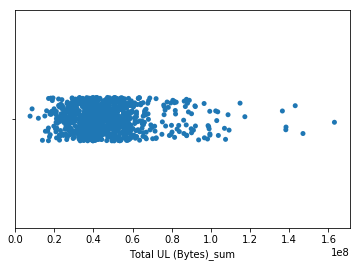

In [49]:
#Point plot of total upload per user by using sample data of 1000
sns.stripplot(x=newdf['Total UL (Bytes)_sum'].sample(1000))
plt.show()

As we ca see from above plots both total download and total upload have outliers and must be removed

### Graphical Univariate Analysis for the total data volume (in Bytes) during this session for each application

#### Social media

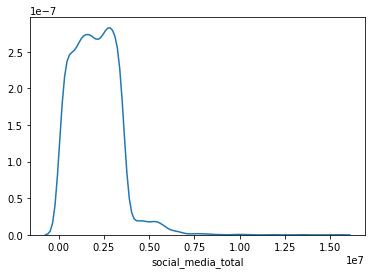

In [59]:
#Histogram of total data used by social media both upload and download in bytes by using sample data of 5000
sns.distplot(newdf['social_media_total'].sample(5000),hist=False)
plt.show()

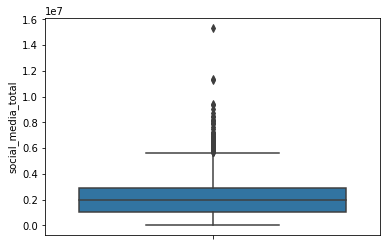

In [60]:
#Box plot of total data used by social media both upload and download in bytes by using sample data of 5000
sns.boxplot(y=newdf['social_media_total'].sample(5000))
plt.show()

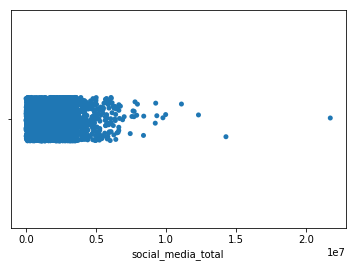

In [61]:
#Point plot of total data used by social media both upload and download in bytes by using sample data of 5000
sns.stripplot(x=newdf['social_media_total'].sample(5000))
plt.show()

As shown above most of the data lies below `0.5+e7 ` and have some outliers

### Google

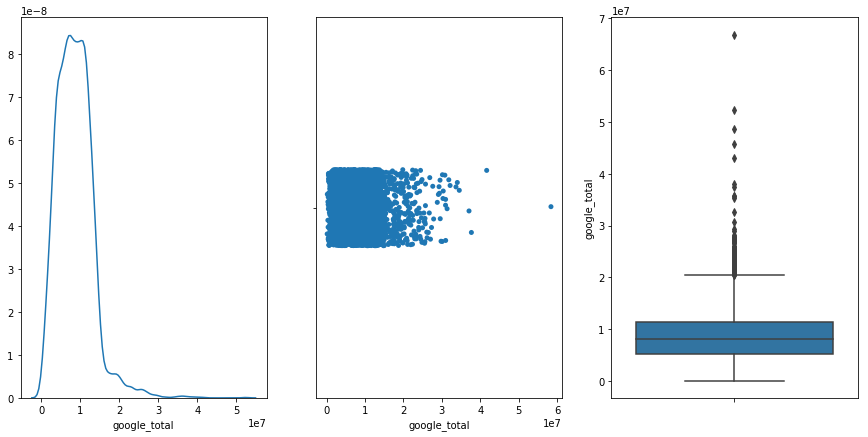

In [67]:
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['google_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['google_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['google_total'].sample(5000),ax=axs[2])
plt.show()

**As we can see from above plots most of the data lies between `0.5+e7` and  `2+e7` and there are some outliers that goes to `5.8+e7`**

#### Email

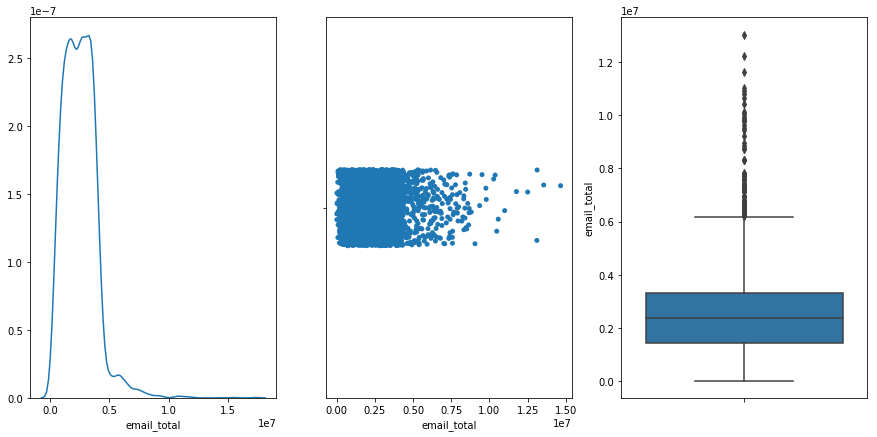

In [68]:
# Histogram, box plot, point plot of email data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['email_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['email_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['email_total'].sample(5000),ax=axs[2])
plt.show()

**As we can see from above plots most of the data lies between `0.15+e7` and  `0.4+e7` and there are some outliers that goes to `1.5+e7`**

#### Youtube data

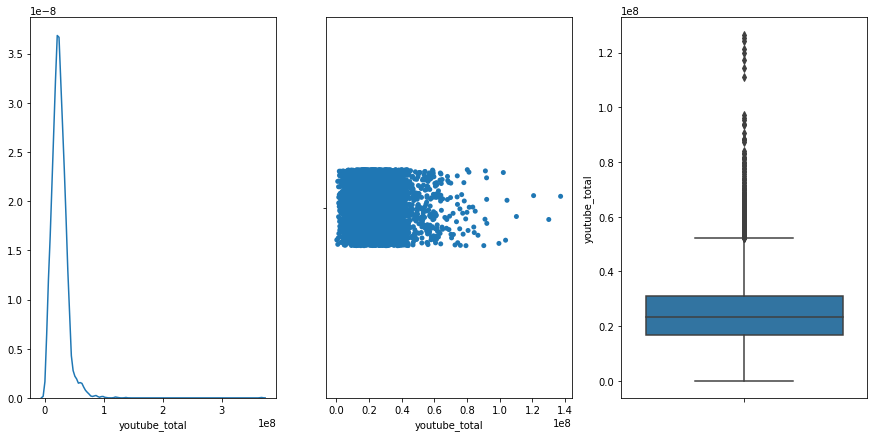

In [69]:
# Histogram, box plot, point plot of youtube data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['youtube_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['youtube_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['youtube_total'].sample(5000),ax=axs[2])
plt.show()

**As we can see from above plots most of the data lies between `0.19+e8` and  `0.4+e8` and there are some outliers that goes to `1.4+e8`**

#### Netflix data 

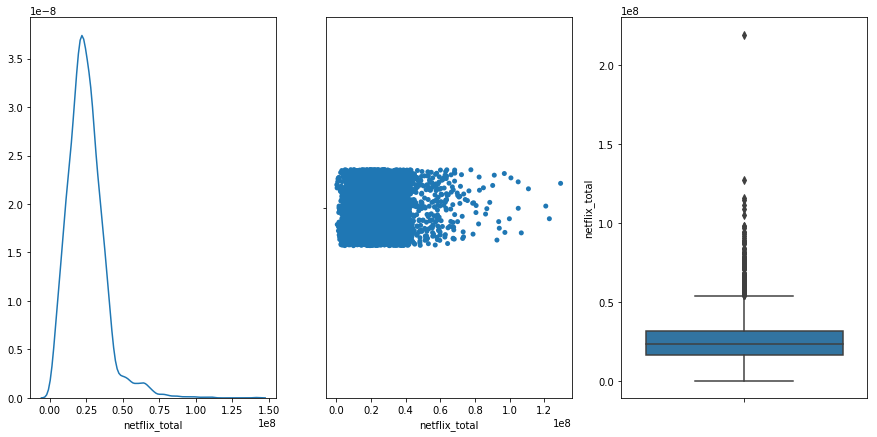

In [74]:
# Histogram, box plot, point plot of netflix data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['netflix_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['netflix_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['netflix_total'].sample(5000),ax=axs[2])
plt.show()

**As we can see from above plots most of the data lies between `0.15+e8` and  `0.4+e8` and there are some outliers that goes to `1.2+e8`**

#### Gaming data

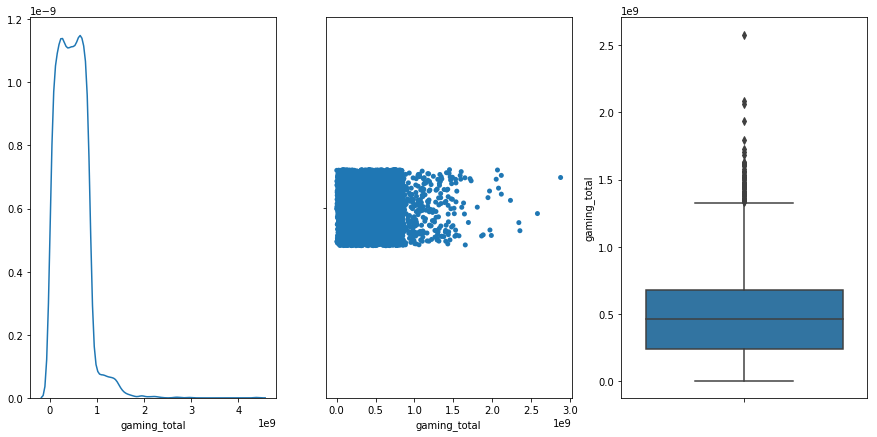

In [72]:
# Histogram, box plot, point plot of gaming data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['gaming_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['gaming_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['gaming_total'].sample(5000),ax=axs[2])
plt.show()

**As we can see from above plots most of the data lies between `0.2+e9` and  `0.75+e9` and there are some outliers that goes to `2.9+e9`**

#### Other data 

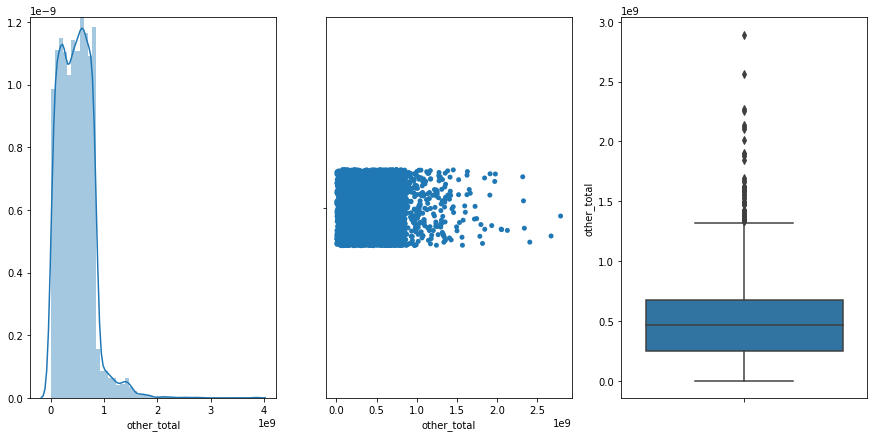

In [90]:
# Histogram, box plot, point plot of other data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['other_total'].sample(5000),ax=axs[0])
sns.stripplot(x=newdf['other_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['other_total'].sample(5000),ax=axs[2])
plt.show()

**As we can see from above plots most of the data lies between `0.1+e9` and  `1+e9` and there are some outliers that goes to `3.5+e9`**

### Bivariate Analysis , explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings

In [96]:
newdf['total_DL_UL'] = newdf['Total DL (Bytes)_sum'] + newdf['Total UL (Bytes)_sum']

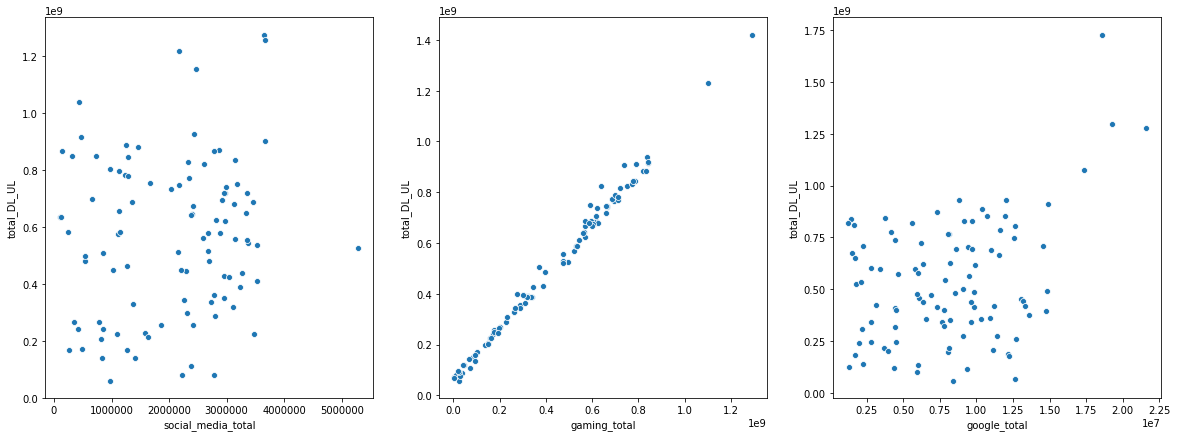

In [119]:
#Scatter plot for social media total, gaming total, and google total for comparasion by using sample data of 100
a4_dims = (20, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.scatterplot(x="social_media_total", y="total_DL_UL",ax=axs[0], data=newdf.sample(100))
sns.scatterplot(x="gaming_total", y="total_DL_UL", ax=axs[1],data=newdf.sample(100))
sns.scatterplot(x="google_total", y="total_DL_UL",ax=axs[2], data=newdf.sample(100))
plt.show()

As we can see from above plot

1. There is a positive correlation between gaming total and total DL + UL.
2. There is no correlation between social media total and total DL + UL.
3. There is some correlation between google total and total DL + UL if we can clear all outliers.

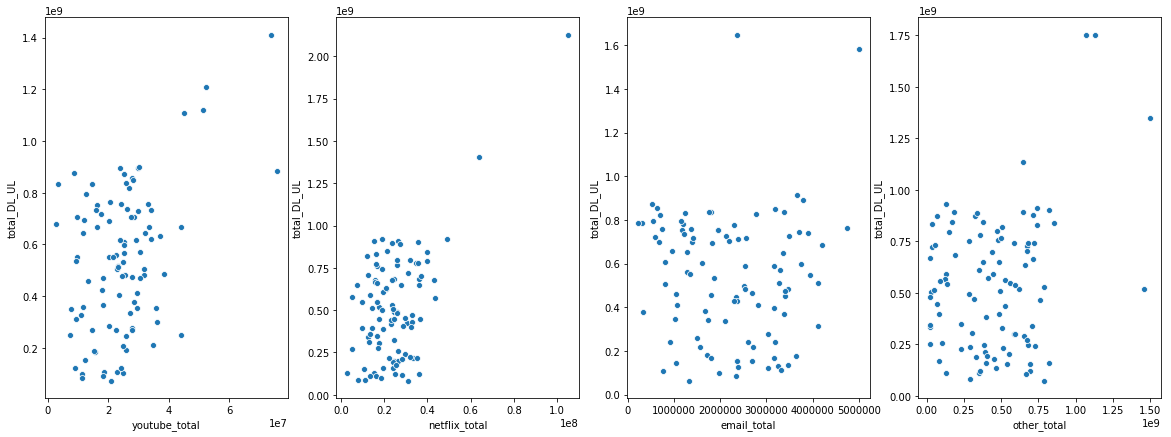

In [122]:
#Scatter plot for youtube total, netflix total,email total and other total for comparasion by using sample data of 1000
a4_dims = (20, 7)
fig, axs = plt.subplots(ncols=4,figsize=a4_dims)
sns.scatterplot(x="youtube_total", y="total_DL_UL",ax=axs[0], data=newdf.sample(100))
sns.scatterplot(x="netflix_total", y="total_DL_UL",ax=axs[1], data=newdf.sample(100))
sns.scatterplot(x="email_total", y="total_DL_UL",ax=axs[2], data=newdf.sample(100))
sns.scatterplot(x="other_total", y="total_DL_UL",ax=axs[3], data=newdf.sample(100))
plt.show()

As we can see from above plot

1. There is no correlation between youtube total and total DL + UL.
2. There is some positive correlation between netflix total and total DL + UL if we can clear the outliers.
3. There is no correlation between email total and total DL + UL.
4. There is no correlation between email total and total DL + UL.

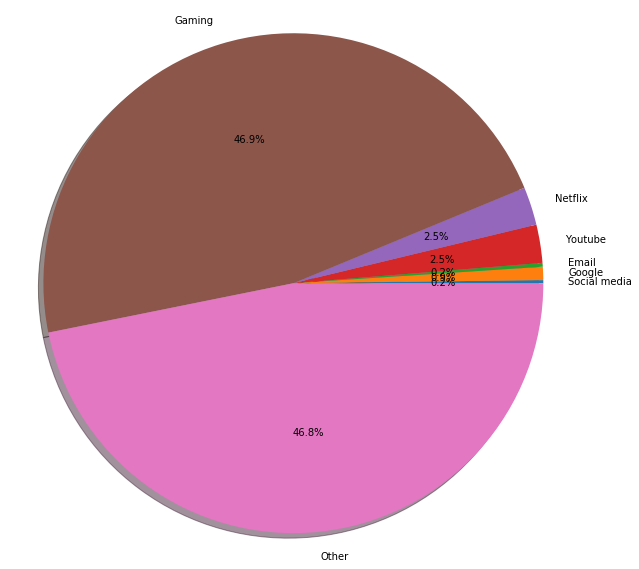

In [106]:
labels = ['Social media', 'Google', 'Email','Youtube','Netflix','Gaming','Other']
sizes = [newdf['social_media_total'].sum(),
         newdf['google_total'].sum(),
         newdf['email_total'].sum(),
         newdf['youtube_total'].sum(),
         newdf['netflix_total'].sum(),
         newdf['gaming_total'].sum(),
         newdf['other_total'].sum(),
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

### Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class

In [138]:
newdf['decile'] = pd.qcut(newdf['Dur. (ms)_sum'], 5, labels=False)

In [142]:
newdf.tail(10)

,Bearer Id_count,Dur. (ms)_sum,Total DL (Bytes)_sum,Total UL (Bytes)_sum,Social Media DL (Bytes)_sum,Social Media UL (Bytes)_sum,Google DL (Bytes)_sum,Google UL (Bytes)_sum,Email DL (Bytes)_sum,Email UL (Bytes)_sum,...,Other UL (Bytes)_sum,social_media_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total,total_DL_UL,decile
Bearer Id,,,,,,,,,,,,,,,,,,,,,
13186541162764599296,1,86399.0,4.866189e+08,3.274328e+07,1210093.0,63505.0,1.408544e+06,2900072.0,1307728.0,94270.0,...,2.457913e+06,1273598.0,4.308616e+06,1401998.0,2.411524e+06,3.714002e+07,4.703685e+08,6.101064e+08,5.193622e+08,1
13186541162806499328,1,80273.0,3.818779e+08,2.149423e+07,208010.0,41789.0,2.184473e+06,2842846.0,510452.0,120908.0,...,3.211377e+06,249799.0,5.027319e+06,631360.0,1.258669e+07,2.748174e+07,3.541838e+08,1.772647e+07,4.033721e+08,1
13186541162863699968,2,210111.0,1.161082e+09,1.001935e+08,1120763.0,48012.0,1.863964e+07,7879494.0,4619580.0,1237686.0,...,2.693898e+07,1168775.0,2.651913e+07,5857266.0,4.857721e+07,5.394693e+07,1.098267e+09,1.044701e+09,1.261275e+09,4
13186541163051399168,1,86401.0,7.906938e+08,5.610281e+07,2653527.0,61628.0,9.706485e+06,1977692.0,1513184.0,755027.0,...,1.639250e+07,2715155.0,1.168418e+07,2268211.0,2.333898e+07,1.689011e+07,7.735075e+08,7.787106e+08,8.467967e+08,2
13186541163088900096,1,80024.0,1.452931e+08,3.541266e+07,3240226.0,38284.0,2.036152e+06,2271168.0,2410615.0,387548.0,...,3.888729e+06,3278510.0,4.307320e+06,2798163.0,1.674808e+07,3.275741e+07,1.169276e+08,6.997699e+08,1.807058e+08,1
13186541164985800704,1,145291.0,3.870016e+08,3.618959e+07,3062671.0,48953.0,9.363661e+06,4001970.0,2192057.0,866373.0,...,1.294741e+07,3111624.0,1.336563e+07,3058430.0,2.430037e+07,3.007163e+07,3.363361e+08,3.842087e+08,4.231912e+08,3
13186541166737199104,1,86399.0,8.726888e+08,3.591946e+07,720996.0,42836.0,1.541915e+06,2100839.0,2315638.0,839789.0,...,9.094407e+06,763832.0,3.642754e+06,3155427.0,1.317002e+07,3.454038e+07,8.442414e+08,7.063547e+08,9.086083e+08,1
13186541166776899584,1,86399.0,3.863551e+08,4.087768e+07,2492460.0,39905.0,1.131819e+07,466218.0,2612190.0,618629.0,...,1.279780e+07,2532365.0,1.178441e+07,3230819.0,3.892724e+07,1.786902e+07,3.400911e+08,3.018329e+07,4.272327e+08,1
13186541167134199808,1,103113.0,3.272128e+08,4.614756e+07,1314234.0,27938.0,6.969652e+06,3756009.0,3317462.0,408257.0,...,6.398758e+06,1342172.0,1.072566e+07,3725719.0,1.373544e+07,2.761710e+07,3.098155e+08,4.466892e+08,3.733604e+08,2


In [153]:
data_per_decile = newdf.groupby(['decile']).agg({'total_DL_UL':['sum']})
data_per_decile.columns = ["_".join(x) for x in data_per_decile.columns.ravel()]

In [151]:
data_per_decile

,total_DL_UL_sum
0,1.379183e+13
1,1.867344e+13
2,8.655780e+12
3,1.399893e+13
4,1.871346e+13


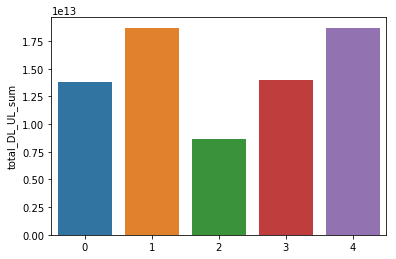

In [154]:
sns.barplot(x=[0,1,2,3,4],y="total_DL_UL_sum",data=data_per_decile)

### Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings

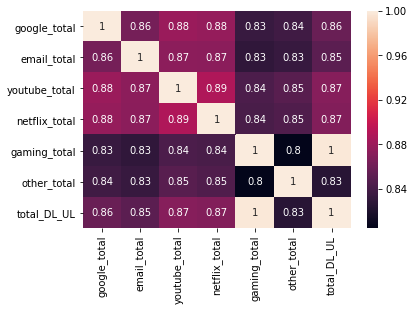

In [159]:
#Correlation matrix between the all application and also total_DL_UL
sns.heatmap(newdf.iloc[:,-8:-1].corr(),annot = True)
plt.show()

In [160]:
newdf.iloc[:,-8:-1].corr()

,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total,total_DL_UL
google_total,1.000000,0.863055,0.879672,0.877408,0.834137,0.837914,0.857644
email_total,0.863055,1.000000,0.873675,0.872860,0.828937,0.833021,0.850938
youtube_total,0.879672,0.873675,1.000000,0.888860,0.843824,0.849033,0.870589
netflix_total,0.877408,0.872860,0.888860,1.000000,0.842286,0.845378,0.869078
gaming_total,0.834137,0.828937,0.843824,0.842286,1.000000,0.804436,0.998200
other_total,0.837914,0.833021,0.849033,0.845378,0.804436,1.000000,0.825208
total_DL_UL,0.857644,0.850938,0.870589,0.869078,0.998200,0.825208,1.000000


### Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results